In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
train_dir = r"E:\Cnn_ Brain_Tumor Dataset\Training"
test_dir = r"E:\Cnn_ Brain_Tumor Dataset\Testing"


In [3]:
#  preprocessing 
img_size = 224
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=15,zoom_range=0.1,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),batch_size=batch_size,class_mode='categorical',shuffle=True)

Found 2870 images belonging to 4 classes.


In [5]:
from sklearn.utils.class_weight import compute_class_weight
# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)


Class Weights: {0: np.float64(0.8686440677966102), 1: np.float64(0.8728710462287105), 2: np.float64(1.8164556962025316), 3: np.float64(0.8675937122128174)}


In [6]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),batch_size=batch_size,class_mode='categorical',shuffle=False)

Found 394 images belonging to 4 classes.


In [7]:
#  model building 
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)


In [8]:
# Freeze pretrained layers
for layer in base_model.layers:
    layer.trainable = False

In [9]:
# Custom classifier head
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

In [24]:
#   model compilation
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [25]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,138,500 (80.64 MB)

 Trainable params: 6,423,812 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [29]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    class_weight=class_weights,
    callbacks=[early_stop]
)


Epoch 1/50
18/90 ━━━━━━━━━━━━━━━━━━━━ 17:21 14s/step - accuracy: 0.8732 - loss: 0.3168

KeyboardInterrupt: 

In [34]:
for layer in model.layers:
    if layer.name.startswith("block5_conv"):
        layer.trainable = True



In [35]:
model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [36]:
history_finetune = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    class_weight=class_weights,
    callbacks=[early_stop]
)


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2244s 25s/step - accuracy: 0.8770 - loss: 0.3071 - val_accuracy: 0.6904 - val_loss: 1.5411
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 18202s 204s/step - accuracy: 0.9010 - loss: 0.2439 - val_accuracy: 0.7030 - val_loss: 1.5841
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1643s 18s/step - accuracy: 0.9192 - loss: 0.2070 - val_accuracy: 0.7208 - val_loss: 1.5655
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1624s 18s/step - accuracy: 0.9209 - loss: 0.1930 - val_accuracy: 0.7183 - val_loss: 1.8010
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1576s 18s/step - accuracy: 0.9324 - loss: 0.1720 - val_accuracy: 0.7411 - val_loss: 1.7738
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1596s 18s/step - accuracy: 0.9470 - loss: 0.1493 - val_accuracy: 0.7208 - val_loss: 1.8929


In [46]:
for layer in model.layers:
    if layer.name.startswith("block4") or layer.name.startswith("block5"):
        layer.trainable = True


In [58]:
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [74]:
# Increase weight for glioma class
class_weights = {
    0: 3.0,   # glioma_tumor (IMPORTANT)
    1: 1.2,   # meningioma_tumor
    2: 1.0,   # no_tumor
    3: 1.2    # pituitary_tumor
}


In [75]:
print(test_generator.class_indices)


{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


In [76]:
history_finetune2 = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator,
    class_weight=class_weights,
    callbacks=[early_stop]
)


Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 3715s 41s/step - accuracy: 0.9261 - loss: 0.3086 - val_accuracy: 0.7411 - val_loss: 1.7938
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 3817s 43s/step - accuracy: 0.9456 - loss: 0.2223 - val_accuracy: 0.7690 - val_loss: 1.4439
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 2842s 31s/step - accuracy: 0.9366 - loss: 0.2320 - val_accuracy: 0.7716 - val_loss: 1.3545
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 3153s 35s/step - accuracy: 0.9613 - loss: 0.1578 - val_accuracy: 0.7690 - val_loss: 2.0807
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 3106s 35s/step - accuracy: 0.9645 - loss: 0.1418 - val_accuracy: 0.7640 - val_loss: 1.7609


In [77]:
loss, accuracy = model.evaluate(test_generator)
print("Test Accuracy:", accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 213s 16s/step - accuracy: 0.7716 - loss: 1.3545
Test Accuracy: 0.7715736031532288


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [79]:
prediction = model.predict(test_generator)

13/13 ━━━━━━━━━━━━━━━━━━━━ 293s 22s/step


In [80]:
y_pred = np.argmax(prediction, axis=1)
y_true = test_generator.classes

In [81]:
class_labels = list(test_generator.class_indices.keys())

In [82]:
cm = confusion_matrix(y_true, y_pred)

In [83]:
cm

array([[ 29,  35,  32,   4],
       [  5,  99,   4,   7],
       [  0,   0, 105,   0],
       [  3,   0,   0,  71]])

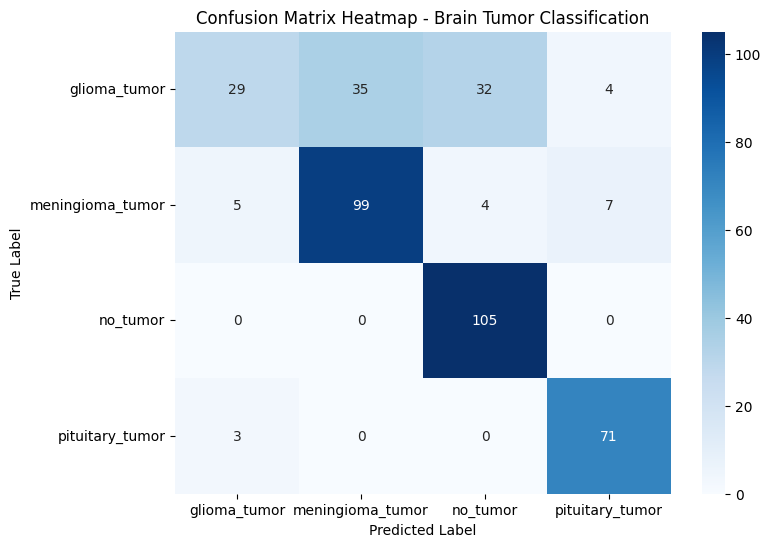

In [84]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_labels,
    yticklabels=class_labels
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap - Brain Tumor Classification")
plt.show()


In [85]:
print(classification_report(
    y_true,
    y_pred,
    target_names=test_generator.class_indices.keys()
))

                  precision    recall  f1-score   support

    glioma_tumor       0.78      0.29      0.42       100
meningioma_tumor       0.74      0.86      0.80       115
        no_tumor       0.74      1.00      0.85       105
 pituitary_tumor       0.87      0.96      0.91        74

        accuracy                           0.77       394
       macro avg       0.78      0.78      0.75       394
    weighted avg       0.78      0.77      0.74       394



In [86]:

print(model)

<Functional name=functional, built=True>


In [87]:
for i, layer in enumerate(model.layers):
    print(i, layer, type(layer))


0 <InputLayer name=input_layer, built=True> <class 'keras.src.layers.core.input_layer.InputLayer'>
1 <Conv2D name=block1_conv1, built=True> <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
2 <Conv2D name=block1_conv2, built=True> <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
3 <MaxPooling2D name=block1_pool, built=True> <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
4 <Conv2D name=block2_conv1, built=True> <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
5 <Conv2D name=block2_conv2, built=True> <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
6 <MaxPooling2D name=block2_pool, built=True> <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
7 <Conv2D name=block3_conv1, built=True> <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
8 <Conv2D name=block3_conv2, built=True> <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
9 <Conv2D name=block3_conv3, built=True> <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
10 <MaxPoolin